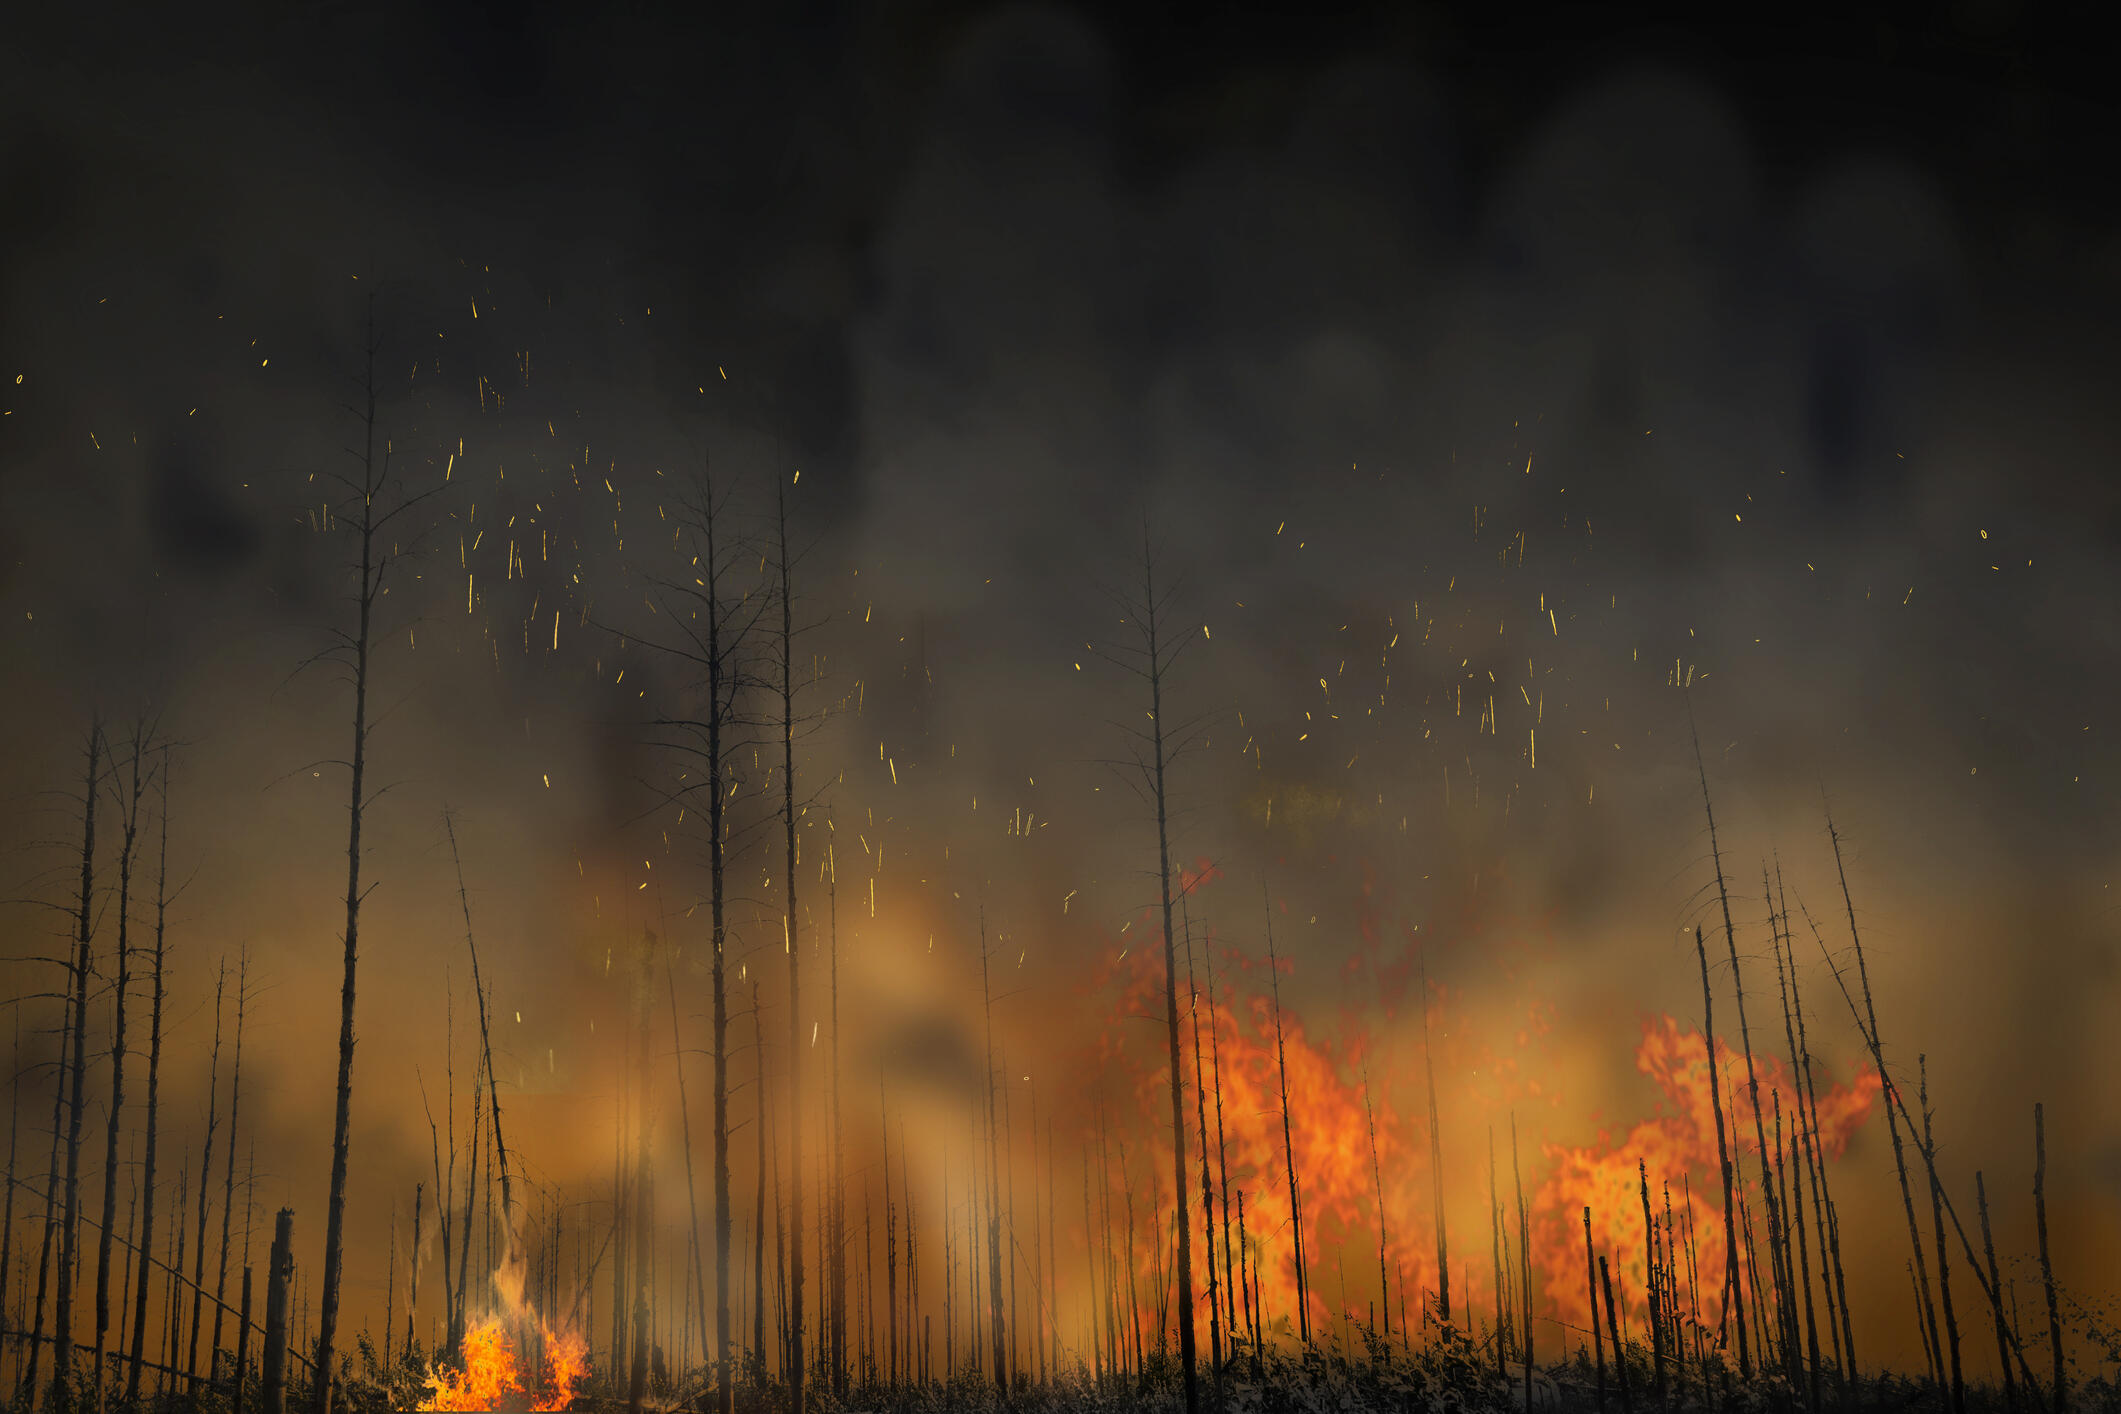

# Model Building on Algerian Forest Fires Dataset

**Life cycle of Machine learning Project (Pipeline)**

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and notFire

# Data Set Information

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the 
 northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- The period from June 2012 to September 2012.
- The dataset includes 13 columns and 244 rows 
- The 244 instances have been classified into fire (138 classes) and notfire(106 classes) classes.
- Source: https://drive.google.com/file/d/1Qr7FQJR6nULyTwCzbx3S6nHdCQf62uLr/view?usp=share_link

# Problem statement

- This dataset comprises features of forest fire which will lead to two classes fire and not fire in Bejaia region and Sidi Bel-abbes region of Algeria.
- User can predict the fire will occur or not based on input features.
- Target feature will be Temperature
- independent feature will be all the features except Temperature.

# Algorithms used:

-  Regression Prediction using Linear Regression.
-  Regression Prediction using Ridge Regression.
-  Regression Prediction using Lasso Regression.
-  Regression Prediction using Elastic Net Regression.

**Importing Liberaries**

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Importing Cleanned Dataset**

In [5]:
df = pd.read_csv('Algerian Cleanned dataset.csv')

In [6]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,Bejaia,2012-06-04
4,4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia,2012-06-05


# Cleanning Data before Model Building

In [ ]:
df.iloc[165:166]
#In FWI feature at in index 165 find irrelevant parameter

In [ ]:
#convert str into int
df['FWI'][165] = int(0)

In [ ]:
df.iloc[165:166]

In [ ]:
#finding median of FWI Feature
replace_med = df['FWI'].median()
replace_med

In [ ]:
#replace 0 with median
df['FWI'][165] = replace_med

In [ ]:
df.iloc[165:166]

**Here in Classes column-**
- Not fire: 0 
- Fire : 1


In [ ]:
#shape
df.shape

In [ ]:
df.info()

In [ ]:
#columns
df.columns

In [ ]:
df['FWI']=df['FWI'].astype(float)

In [ ]:
#dropping unnecessary column 'DC'
df.drop(['DC'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
#convert Date column into datetime type
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.info()

In [ ]:
## Now After Cleanning Data

# Dependent and Independent feature

In [ ]:
#x: All Features except Temperature
#y: Temperature Feature

x = df.iloc[:,1:-2]
x

In [ ]:
y = df.iloc[:,0]
y

# Split data into Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

# Feature Scaling or standardize the dataset

In [ ]:
#Standardize or Feature Scaling the dataset
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler

In [ ]:
#Apply scaler on train and test data
x_train = scaler.fit_transform(x_train)
x_train

In [ ]:
x_test = scaler.transform(x_test)
x_test

# to avoid data leaking we can't use fit_transform instead we use transform

# Model Training

# 1) Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression
#object of LinearRegression

In [ ]:
regression.fit(x_train,y_train)

**Print Coefficients and Intercept**

In [ ]:
#print the coefficients
regression.coef_

In [ ]:
#print the intercepts
regression.intercept_

#means if all the independent features are 0 then Temperature in the region is 32.17 acc. to the model

**Prediction for the Test Data**

In [ ]:
#prediction
reg_pred = regression.predict(x_test)
reg_pred

# Assumptions of linear Reggression

**To check whether the model is good or bad that is trainned.**

**1) Relation b/w Truth Point(y_test) and Predicted point**

In [ ]:
#comparisom b/w test and Predicted data
#y_test: now we need to validate this model w.r.to this prediction so that we r using y_test

plt.scatter(y_test,reg_pred);
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

**Observation -**   If model gives linear realation means model is good

**2) Residuals : Difference b/w Truth value(y_test) and Predicted value(reg_pred)**
- Aim is to calculate the error

In [ ]:
residuals = y_test-reg_pred
residuals

In [ ]:
#displot for above errors
sns.displot(residuals, kind='kde');

**Observation-**
- gives Gaussian Distribution
- little bit skewed towards left due to outliers

**3) Scater Plot of Prediction and residuals**
- should gives uniform distribution
- follow 'Homoscedasticity', or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared.

In [ ]:
plt.scatter(reg_pred,residuals);

**4) Performance Metrices for Regression**

In [ ]:
#MSE, MAE, RMSE, R Squared and Adjusted R square

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(reg_pred,y_test))
print(mean_absolute_error(reg_pred,y_test))
print(np.sqrt(mean_squared_error(reg_pred,y_test)))

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

In [ ]:
# Adjusted R2
#display adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

# 2) Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

In [ ]:
ridge

In [ ]:
ridge.fit(x_train,y_train)

**Print Coefficients and Intercept**

In [ ]:
#print the coefficients
print(ridge.coef_)

In [ ]:
ridge.intercept_

In [ ]:
ridge_pred = ridge.predict(x_test)
ridge_pred

# Assumptions on Ridge Regression

**1) Relation b/w Truth Point(y_test) and Predicted point**

In [ ]:
plt.scatter(y_test,reg_pred);
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

**Observation -**   If model gives linear realation means model is good

**2) Residuals : Difference b/w Truth value(y_test) and Predicted value(reg_pred)**
- Aim is to calculate the error

In [ ]:
residuals = y_test-reg_pred
residuals

In [ ]:
#displot for above errors
sns.displot(residuals, kind='kde');

**Observation-**
- gives Gaussian Distribution
- little bit skewed towards left due to outliers

**3) Scater Plot of Prediction and residuals**
- should gives uniform distribution
- follow 'Homoscedasticity', or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared.

In [ ]:
plt.scatter(reg_pred,residuals);

**4) Performance Metrices for Regression**

In [ ]:
#MSE, MAE, RMSE, R Squared and Adjusted R square

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(reg_pred,y_test))
print(mean_absolute_error(reg_pred,y_test))
print(np.sqrt(mean_squared_error(reg_pred,y_test)))

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)
print(score)

In [ ]:
# Adjusted R2
#display adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

# 3) Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso

In [ ]:
lasso.fit(x_train,y_train)

**Print Coefficients and Intercept**

In [ ]:
#print the coefficients
print(lasso.coef_)

In [ ]:
lasso.intercept_

In [ ]:
# lasso_pred = lasso.predict(x_test)
lasso_pred

# Assumptions on Lasso Regression

**1) Relation b/w Truth Point(y_test) and Predicted point**

In [ ]:
plt.scatter(y_test,reg_pred);
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

**Observation -**   If model gives linear realation means model is good

**2) Residuals : Difference b/w Truth value(y_test) and Predicted value(reg_pred)**
- Aim is to calculate the error

In [ ]:
residuals = y_test-lasso_pred
residuals

In [ ]:
#displot for above errors
sns.displot(residuals, kind='kde');

**Observation-**
- gives Gaussian Distribution

**3) Scater Plot of Prediction and residuals**
- should gives uniform distribution
- follow 'Homoscedasticity', or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared.

In [ ]:
plt.scatter(lasso_pred,residuals);

**4) Performance Metrices for Regression**

In [ ]:
#MSE, MAE, RMSE, R Squared and Adjusted R square

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(lasso_pred,y_test))
print(mean_absolute_error(lasso_pred,y_test))
print(np.sqrt(mean_squared_error(lasso_pred,y_test)))

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lasso_pred)
print(score)

In [ ]:
# Adjusted R2
#display adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

# 4) Elastic Regression Model

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet()
elastic

In [ ]:
elastic.fit(x_train,y_train)

**Print Coefficients and Intercept**

In [ ]:
#print the coefficients
print(elastic.coef_)

In [ ]:
elastic.intercept_

In [ ]:
elastic_pred = elastic.predict(x_test)
elastic_pred

# Assumptions on Elastic Net Regression

**1) Relation b/w Truth Point(y_test) and Predicted point**

In [ ]:
plt.scatter(y_test,reg_pred);
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

**Observation -**   If model gives linear realation means model is good

**2) Residuals : Difference b/w Truth value(y_test) and Predicted value(reg_pred)**
- Aim is to calculate the error

In [ ]:
residuals = y_test-elastic_pred
residuals

In [ ]:
#displot for above errors
sns.displot(residuals, kind='kde');

**Observation-**
- gives Gaussian Distribution

**3) Scater Plot of Prediction and residuals**
- should gives uniform distribution
- follow 'Homoscedasticity', or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared.

In [ ]:
plt.scatter(elastic_pred,residuals);

**4) Performance Metrices for Regression**

In [ ]:
#MSE, MAE, RMSE, R Squared and Adjusted R square

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(elastic_pred,y_test))
print(mean_absolute_error(elastic_pred,y_test))
print(np.sqrt(mean_squared_error(elastic_pred,y_test)))

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,elastic_pred)
print(score)

In [ ]:
# Adjusted R2
#display adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

# Conclusion

**As Adjusted R squarred of Ridge Regression is maximum i.e,0.45 (45%) , We can consider 'Ridge regression' is optimal Model**